# Linear Regression on 5JUN2023 data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

## load data
* fill missing values with `0`
* set male to `0` and female to `1`

In [2]:
df = pd.read_csv("../data/5JUN2023_Provisional_endo_study_data_to_test_AI.csv").fillna(0)
df.Sex = np.where(df.Sex == "male", 0, 1)
# df.Sex = df.Sex.astype('category')
df.head()

,Sex,A_EPM_distance,A_EPM_pct_open_arms,A_Open_field_distance,A_LOF_pct_center,RP_Withdrawal_latency,OR_lick_time,OR_num_lick_bursts,OR__Lick_burst_length,FSA_Consumption_time,DSA_1st_week_infusions,OPAD_37oC__lick_face,OPAD_46_5oC_lick_face,RP_Delta_hargreaves
0,0,1272.67,31.58,5128.37,12.46,14.48,97.350,69.25,1.372342,66.45,86.0,10.25,1.50,0.06
1,0,1272.52,18.75,5037.27,10.68,14.84,85.125,105.00,1.444197,75.28,87.0,24.75,5.50,0.17
2,0,1462.30,29.03,5340.03,19.06,11.68,205.375,112.75,1.459464,64.88,120.0,15.00,5.00,-1.38
3,0,1288.02,20.59,5384.21,5.36,12.69,185.550,71.75,1.312209,29.45,94.0,15.75,4.25,-0.41
4,0,880.52,4.35,3919.19,1.65,17.56,239.200,136.75,1.912567,61.02,108.0,18.75,5.00,2.49


## heatmap
For fun, let's look at a heatmap of correlation matrix. 
The highest correlation for `DSA_1st_week_infusions` are `OR_lick_time`, `FSA_Consumption_time`, and `OPAD_46_5oC_lick_face`
Code for heatmap found here: https://stackoverflow.com/questions/39409866/correlation-heatmap

In [3]:
corr_df = df.corr()

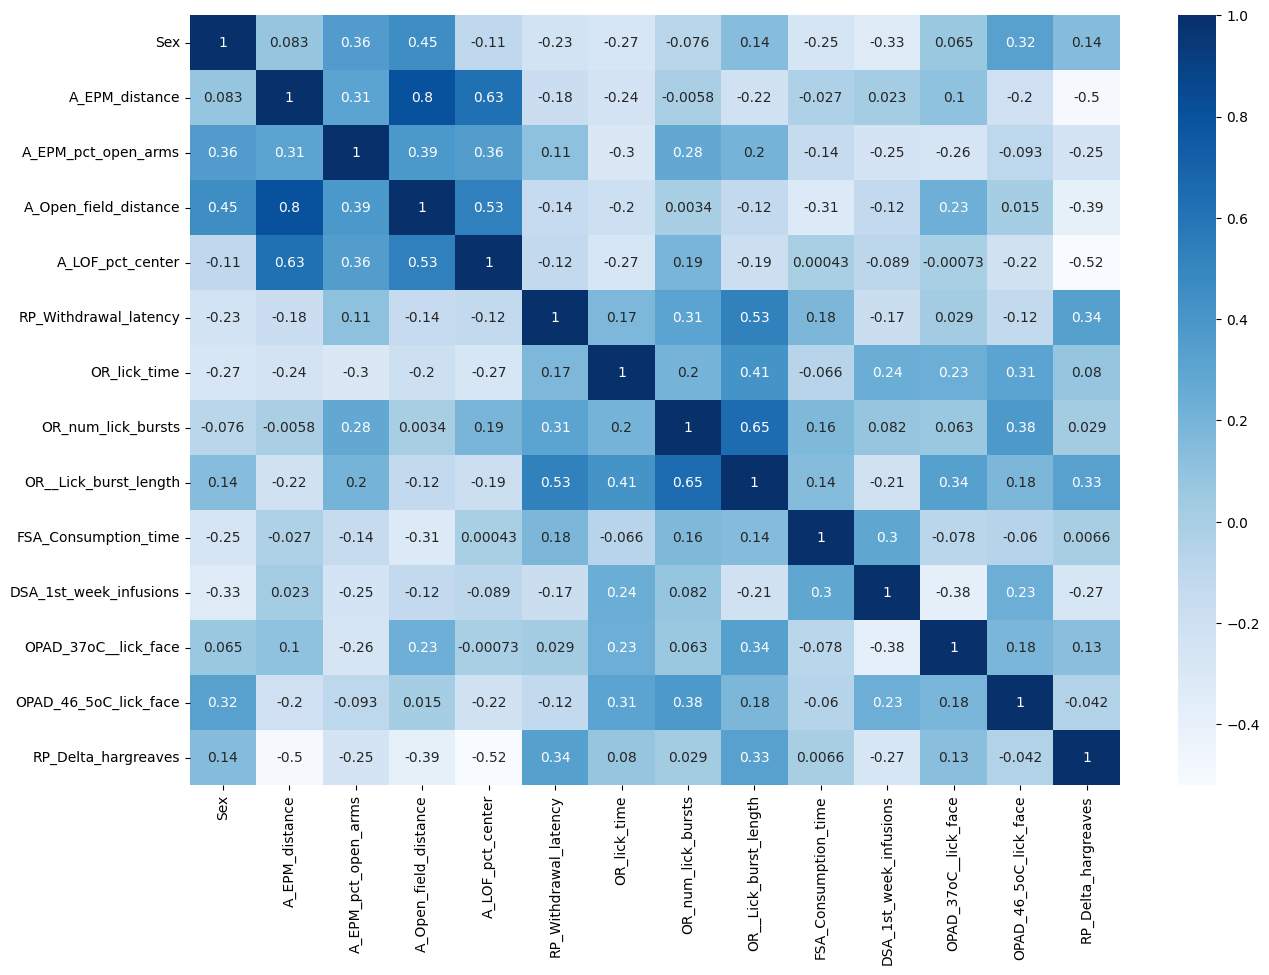

In [4]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_df, cmap="Blues", annot=True)
plt.show()

#### perform linear regresion 
* y=`DSA_1st_week_infusions`
* x=`OR_lick_time`, `FSA_Consumption_time`, `OPAD_46_5oC_lick_face`

In [5]:
temp_df = df[["OR_lick_time", "FSA_Consumption_time", "OPAD_46_5oC_lick_face"]]

#### set feature and target data  
* `values` converts column into a `numpy` array
* `-1` means that calculate the dimension of rows, but have 1 column

In [6]:
# set target
y = df.DSA_1st_week_infusions.values.reshape(-1, 1)

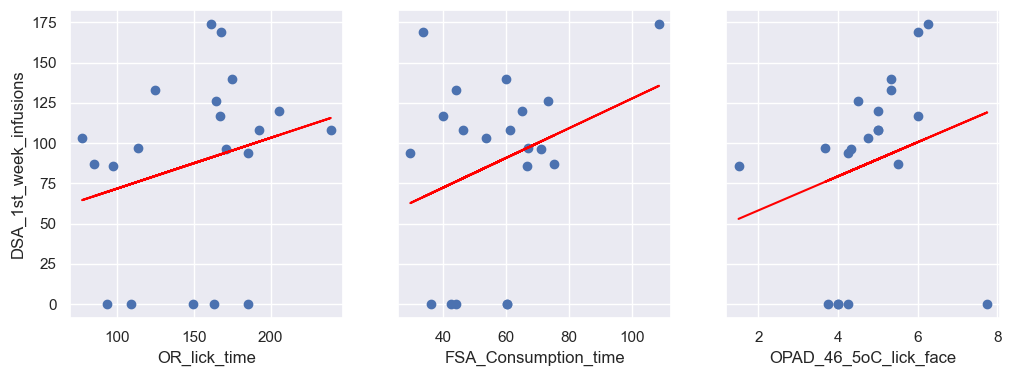

In [7]:
# fig with 1 row, 3 cols
sns.set(font_scale=1)
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12,4))

# instantiate linear regress model
model = LinearRegression()

for i, col in enumerate(temp_df.columns):
    x = df[col].values.reshape(-1, 1) # get col as numpy array

    # fit & predict
    model.fit(x, y)
    y_pred = model.predict(x)

    # plot results
    axs[i].scatter(x, y)
    axs[i].plot(x, y_pred, color='red')
    axs[i].set_xlabel(col)

# set shared y axis
axs[0].set_ylabel("DSA_1st_week_infusions")
plt.show()

## perform pairplot to see how other variables are correlated.
The resuls are a bit hard to read, but you can open up the `linear_regression_pairplot_5JUN2023.png` image and zoom in.

<Figure size 100000x100000 with 0 Axes>

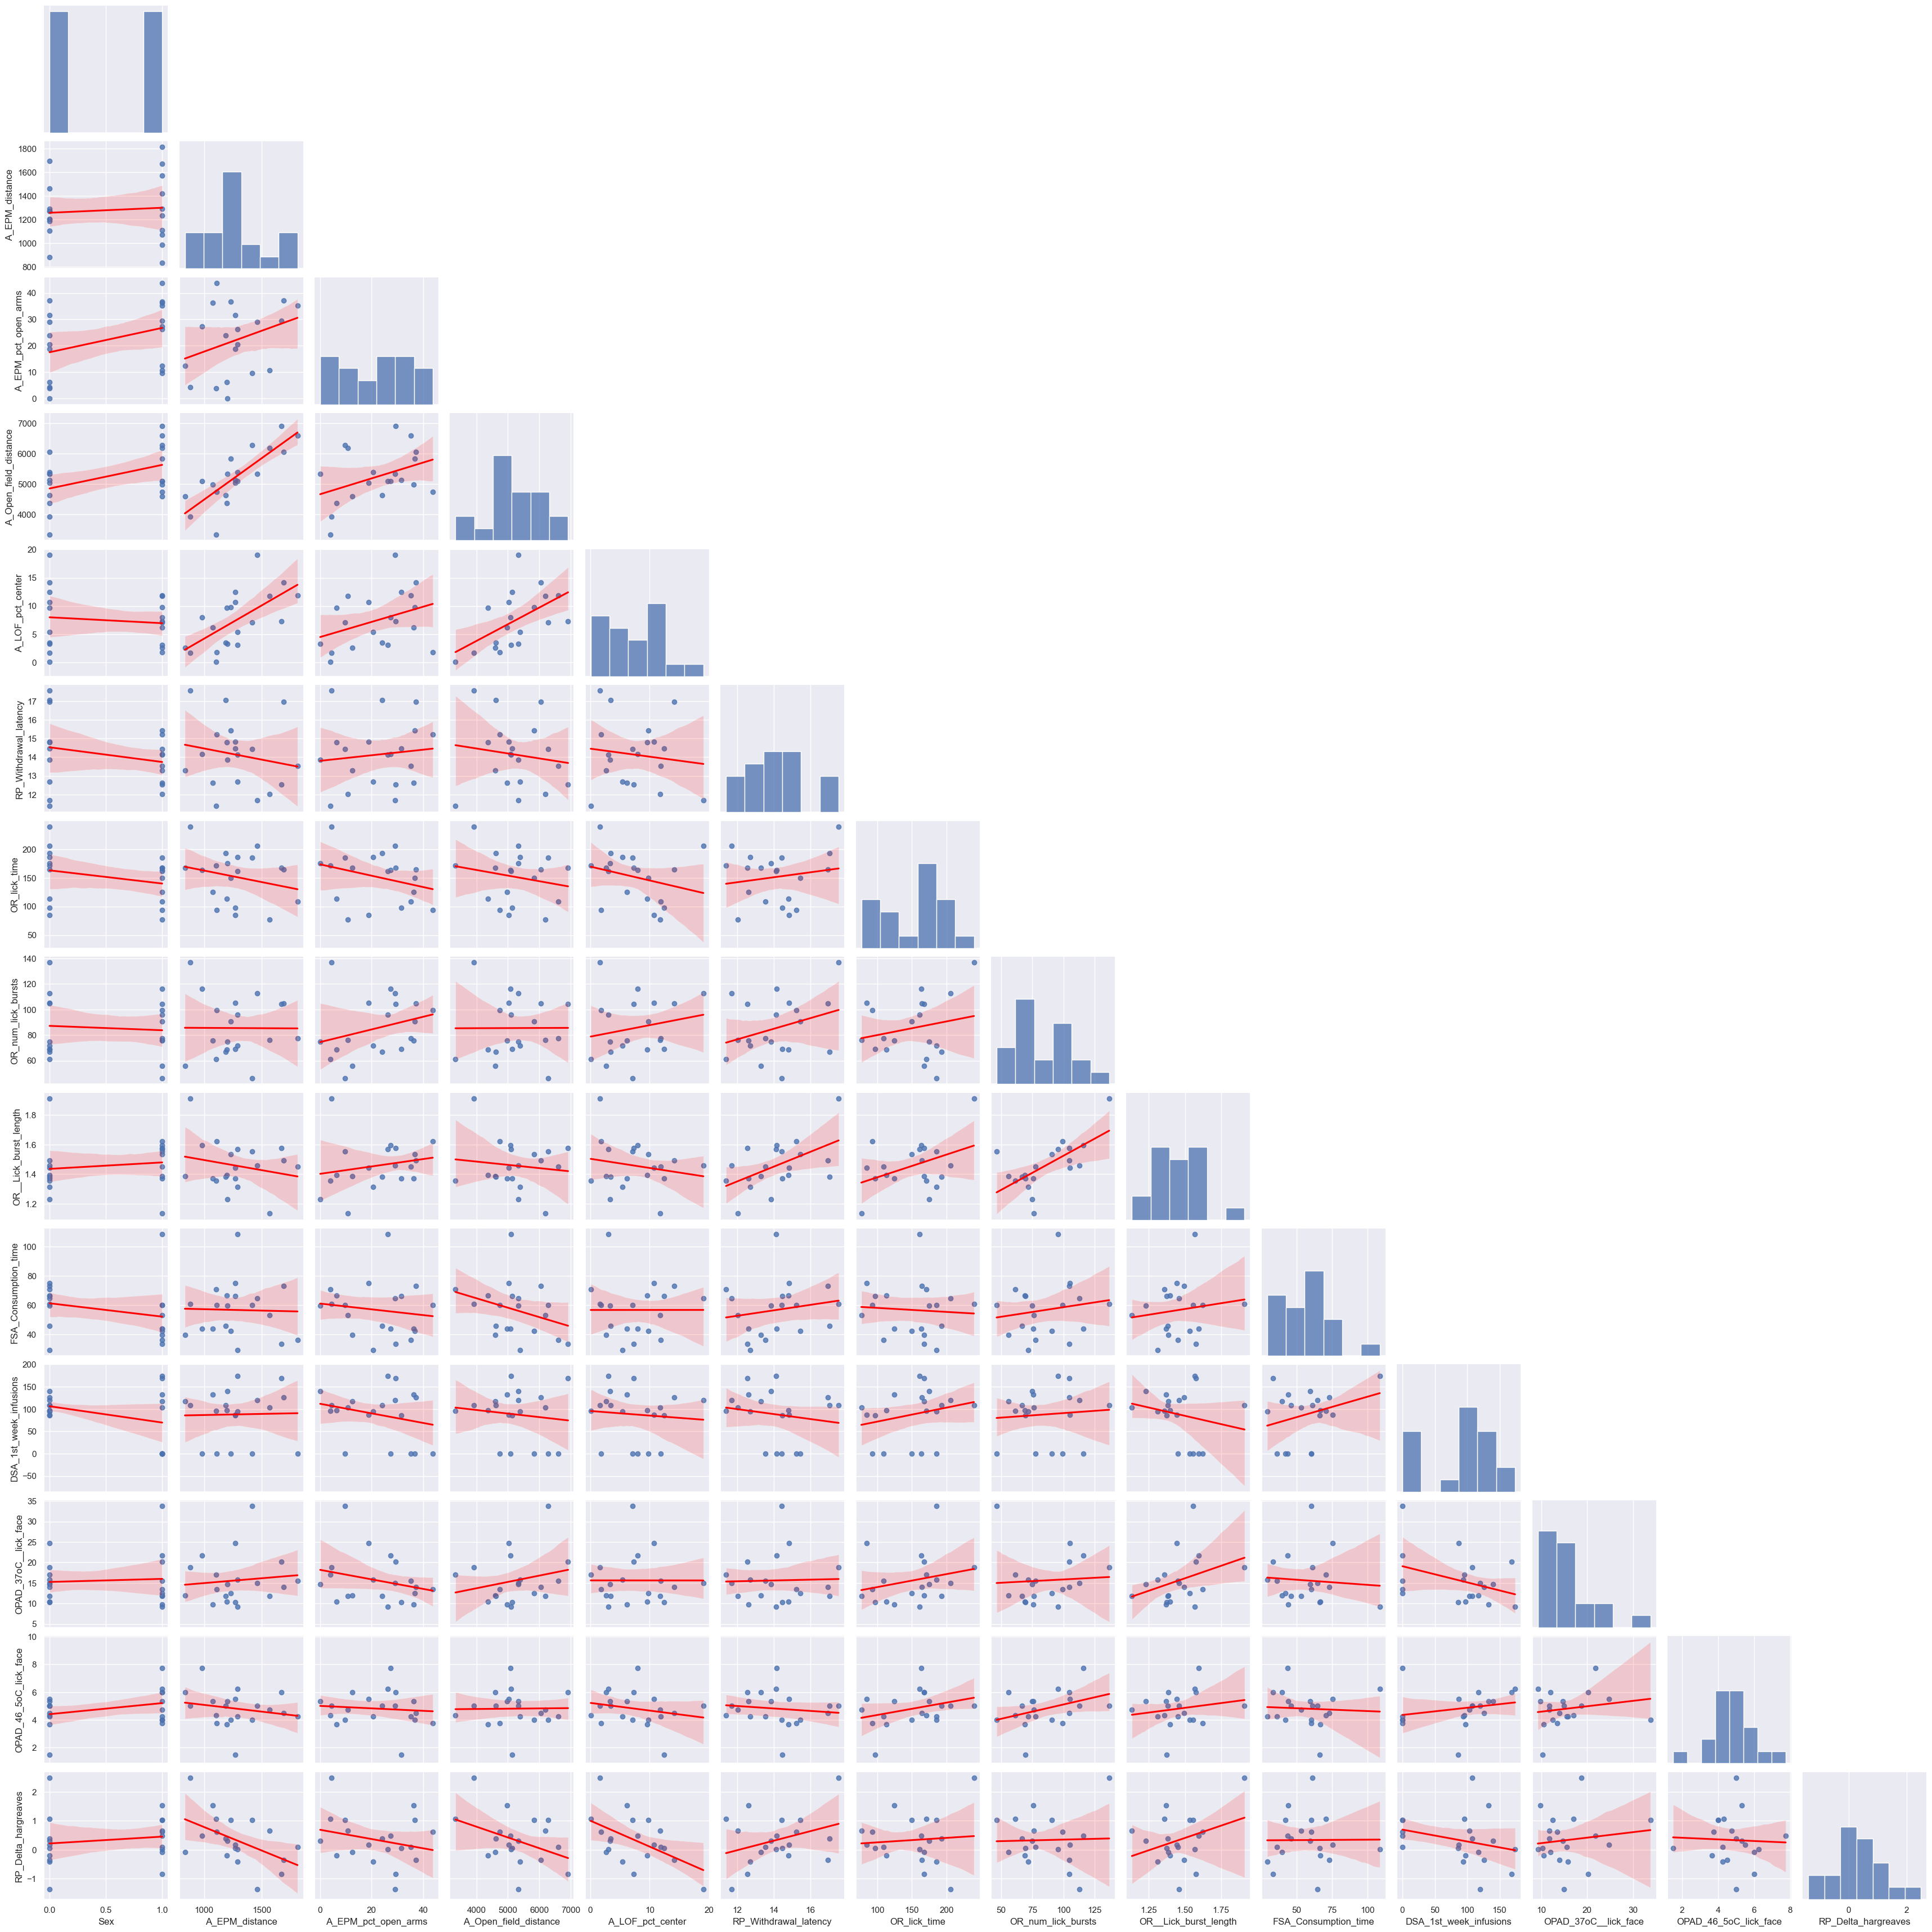

In [8]:
plt.figure(figsize=(1000,1000))
sns.set(font_scale=1)
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}}, corner=True)
plt.savefig("../images/5JUN2023_linear_regression_pairplot.png", format="png", dpi=600)
plt.show()